In [52]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   Fare      712 non-null    float64
 4   Embarked  712 non-null    object 
 5   Survived  712 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 38.9+ KB


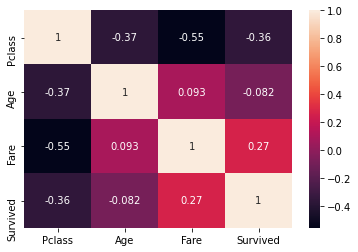

In [53]:
#a) Pre-processing
data=pd.read_csv('titanic.csv')
data=data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
row=[]
c=data.loc[:, data.isnull().any()].columns
for i in c:
    for j in range(len(data[i])):
        if(pd.isna(data[i][j])==True):
            row.append(j)
row=set(row) 
data=data.drop(row)
data.info()
df_small = data.iloc[:,:]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=[]
for i in data:
    if data.dtypes[i]=='object':
        l.append(i)
        data[i]=le.fit_transform(data[i])       

array([[<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Sex', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Embarked', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Age', ylabel='Sex'>,
        <AxesSubplot:xlabel='Fare', ylabel='Sex'>,
        <AxesSubplot:xlabel='Embarked', ylabel='Sex'>,
        <AxesSubplot:xlabel='Survived', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Embarked', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>],
       [<AxesSubplot:xlabel='Pclass',

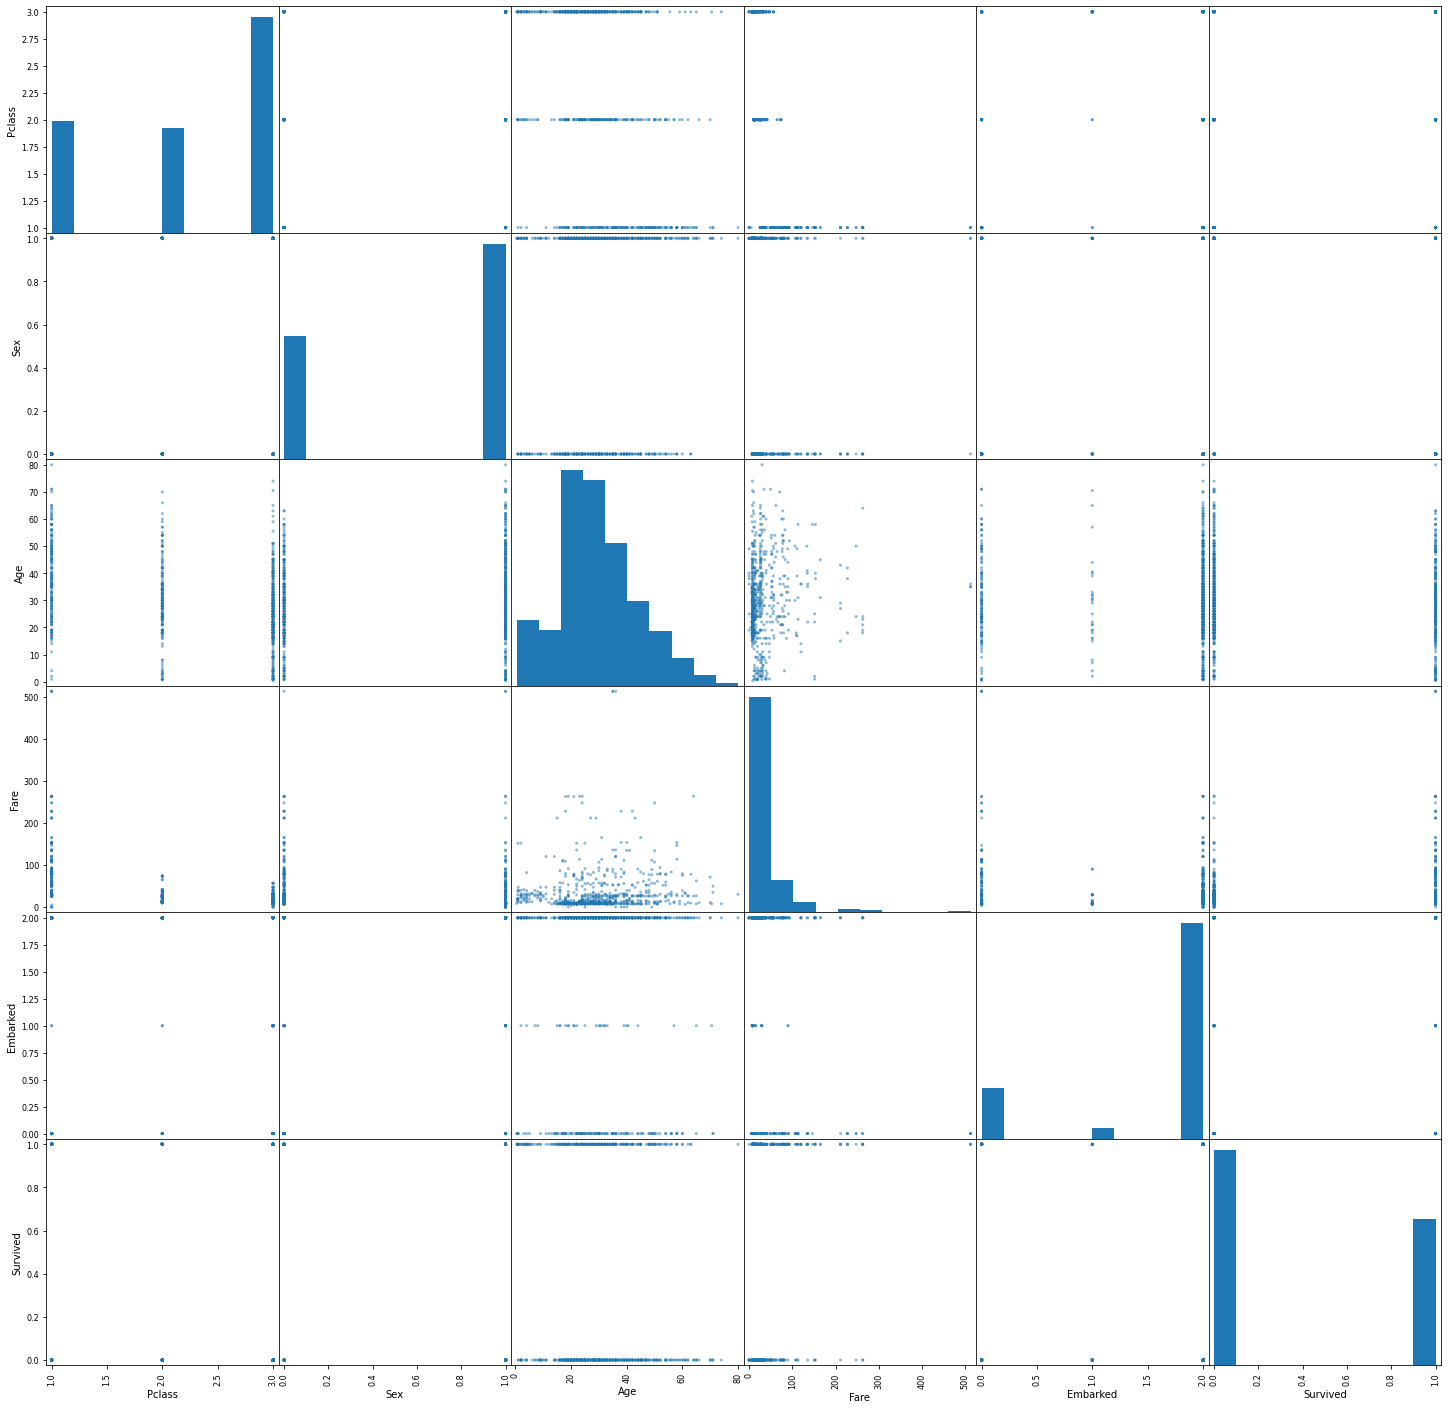

In [55]:
#data_visualisation
from pandas.plotting import scatter_matrix
scatter_matrix(data[data.columns],figsize=(25,25))

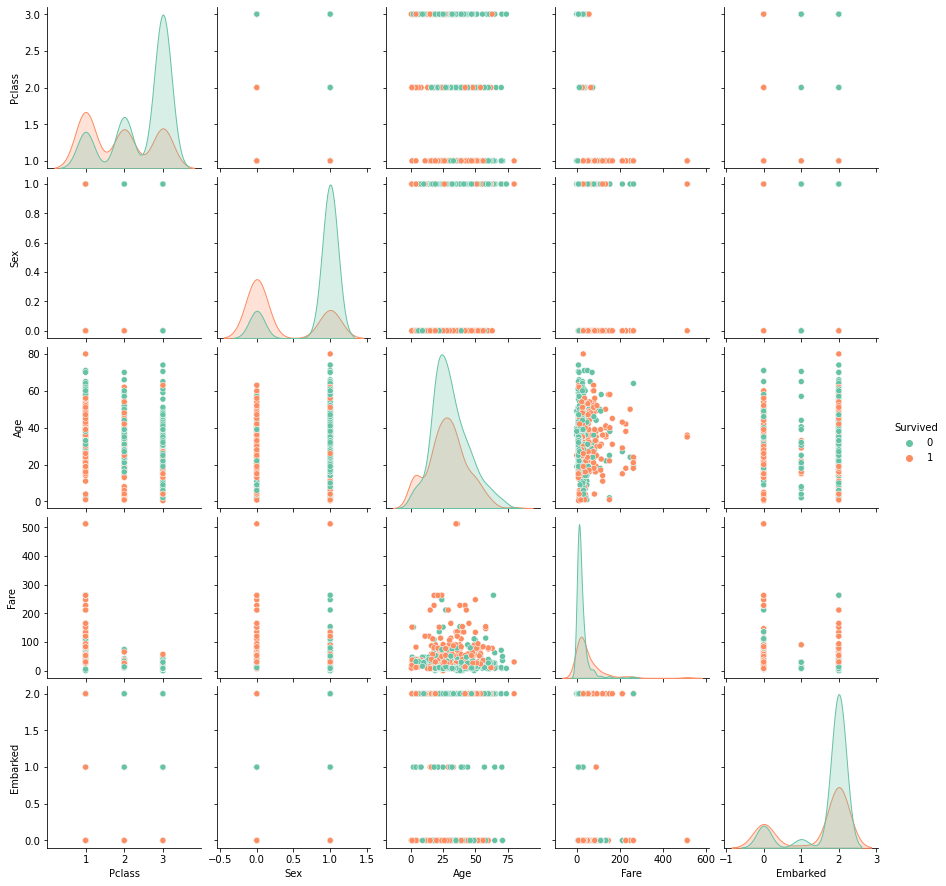

In [56]:

sns.pairplot(data, hue = "Survived", palette="Set2")

<ipython-input-57-05fe1bcf8002>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax1,color="orange",linewidth=2,edgecolor="Black")


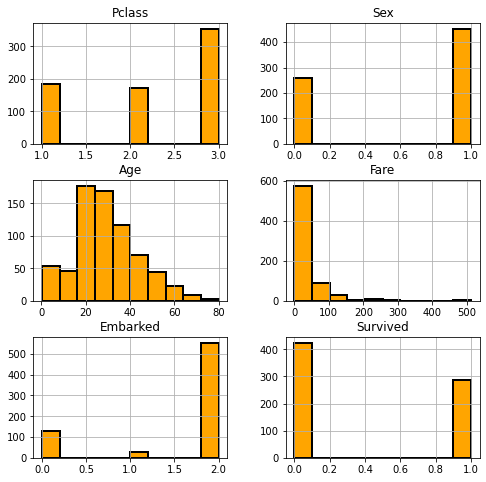

In [57]:
fig = plt.figure(figsize = (8,8))
ax1 = fig.gca()
data.hist(ax=ax1,color="orange",linewidth=2,edgecolor="Black")
plt.show()

In [58]:
#data_splitting
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=48)
print(X_train)

     Pclass  Sex   Age      Fare  Embarked  Survived
165       3    1   9.0   20.5250         2         1
333       3    1  16.0   18.0000         2         0
132       3    0  47.0   14.5000         2         0
12        3    1  20.0    8.0500         2         0
397       2    1  46.0   26.0000         2         0
..      ...  ...   ...       ...       ...       ...
435       1    0  14.0  120.0000         2         1
572       1    1  36.0   26.3875         2         1
422       3    1  29.0    7.8750         2         0
710       1    0  24.0   49.5042         0         1
649       3    0  23.0    7.5500         2         1

[569 rows x 6 columns]


In [59]:
#Naive_bayes
def naive_bayes(df, X, Y):
    features = list(df.columns)[:-1]
    labels= sorted(list(df[Y].unique()))
    prior_p = []
    for i in labels:
        prior_p.append(len(df[df[Y]==i])/len(df))
    Y_pred = []
    for x in X:
        lh = [1]*len(labels)
        post_p = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                    feat = list(df.columns)
                    df1 = df[df[Y]==labels[j]]
                    mean, std = df1[features[i]].mean(), df1[features[i]].std()
                    prob_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-(x[i]-mean)**2 / (2 * std**2 ))
                    lh[j] *=prob_x_given_y
        for j in range(len(labels)):
            post_p[j] = lh[j] * prior_p[j]
        Y_pred.append(np.argmax(post_p))
    return np.array(Y_pred)

In [60]:
x_test = X_test.iloc[:,:-1].values
Y_test = X_test.iloc[:,-1].values
Y_pred = naive_bayes(X_train, x_test, "Survived")
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8391608391608392

In [61]:
#% fold cross validation
import random
import copy
from random import randrange
random.seed(100)
def cross_validation_split(da, folds):
    d_split =[]
    d_copy = copy.deepcopy(list(da))
    size = int(len(da) / folds)
    
    for i in range(folds):
        fold = []
        while len(fold) < size:
            index = randrange(len(d_copy))
            fold.append(d_copy.pop(index))
        d_split.append(fold)
    return d_split
data_split=np.array(cross_validation_split(np.array(X_train), 5)) 
print(data_split.shape)    

(5, 113, 6)


0.7610619469026548
0.831858407079646
0.7699115044247787
0.7345132743362832
0.7876106194690266
0.7769911504424779


<BarContainer object of 5 artists>

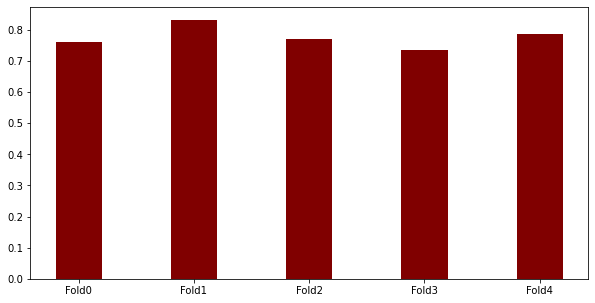

In [62]:
import matplotlib.pyplot as plt
acc=[]
for i in range(len(data_split)):
    x1_train=np.vstack(data_split[(i+1)%5])
    for j in range(5):
        if(j!=i and j!=(i+1)%5):
            x1_train=np.vstack((x1_train,data_split[j]))        
    x1_test=np.vstack(data_split[i])
    x1_train=pd.DataFrame(x1_train, columns = ['Pclass','Sex','Age','Fare','Embarked','Survived'])
    x1_test=pd.DataFrame(x1_test, columns = ['Pclass','Sex','Age','Fare','Embarked','Survived'])
    pred = naive_bayes(x1_train, x1_test.iloc[:,:-1].values, "Survived")
    acc1=accuracy_score(x1_test.iloc[:,-1].values, pred)
    acc.append(acc1)
    print(acc1)
print(sum(list(acc))/5)    
courses = list('Fold'+str(i) for i in range(5))
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, acc, color ='maroon',width = 0.4) 

In [63]:
#top class probability
def top_class_prob(df, X, Y):
    features = list(df.columns)[:-1]
    labels= sorted(list(df[Y].unique()))
    prior_p = []
    for i in labels:
        prior_p.append(len(df[df[Y]==i])/len(df))
    arr = []
    for x in X:
        lh = [1]*len(labels)
        post_p = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                    feat = list(df.columns)
                    df1 = df[df[Y]==labels[j]]
                    mean, std = df1[features[i]].mean(), df1[features[i]].std()
                    prob_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-(x[i]-mean)**2 / (2 * std**2 ))
                    lh[j] *=prob_x_given_y
        arr.append((list(labels),lh))           
    return arr
top_class=[]
tcp=top_class_prob(X_train, x_test, "Survived")
for i in tcp:
    s1=max(i[1])
    index1=i[1].index(s1)
    top_class.append([i[0][index1],s1])
for i in top_class:
    print("Class"+" "+'['+str(i[0])+']'+" "+"Probability density"+" "+ '('+str(i[1])+')')

Class [1] Probability density (5.884771183942569e-06)
Class [0] Probability density (6.346961589937718e-05)
Class [0] Probability density (7.219142041206978e-05)
Class [1] Probability density (5.92278272808173e-08)
Class [0] Probability density (5.548396750909932e-05)
Class [0] Probability density (3.6353302065987128e-06)
Class [0] Probability density (3.4423026724285326e-06)
Class [1] Probability density (4.6704095082345235e-06)
Class [1] Probability density (1.200437536390502e-06)
Class [1] Probability density (1.2910976638763501e-06)
Class [0] Probability density (6.073530755212035e-05)
Class [0] Probability density (5.713556646467754e-05)
Class [1] Probability density (3.601580298731687e-07)
Class [1] Probability density (5.3654217200318115e-06)
Class [1] Probability density (1.452012758892153e-06)
Class [1] Probability density (8.599077193724528e-06)
Class [1] Probability density (4.4224503514716224e-06)
Class [1] Probability density (5.9422170649857275e-06)
Class [1] Probability 

In [64]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train.iloc[:,:-1],X_train.iloc[:,-1])
y_p=clf.predict(X_test.iloc[:,:-1])
print(accuracy_score(y_p,X_test.iloc[:,-1]))


0.8321678321678322


In [65]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
classifier = DecisionTreeClassifier(random_state=47)
kfold = KFold(n_splits=5, random_state=41, shuffle=True)
acc = cross_val_score(classifier, X_test.iloc[:,:-1], X_test.iloc[:,-1],scoring="accuracy", cv=kfold)
print(sum(acc)/5)

0.7901477832512315


# 2

In [68]:
dataset=pd.read_csv('dataset.csv')
col=['Area','Perimeter',' Compactness','Length of kernel','Width of kernel','Asymmetry coefficient','Length of kernel groove',"Class(1,2,3)"]
dataset = dataset.rename(columns = {'X0':'Area','X1':'Perimeter','X2':'Compactness','X3':'Length of kernel','X4':'Width of kernel','X5':'Asymmetry coefficient','X6':'Length of kernel groove','Y':'Y'})
li=[]
index=0
for i in dataset:
    if dataset[i].dtype=='float64':
        li.append(index)
        index+=1
    else:
        index+=1 
print(li)        
print(dataset)        

[0, 1, 2, 3, 4, 5, 6]
      Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Asymmetry coefficient  Length of kernel groove  Y  
0                    2.221                  

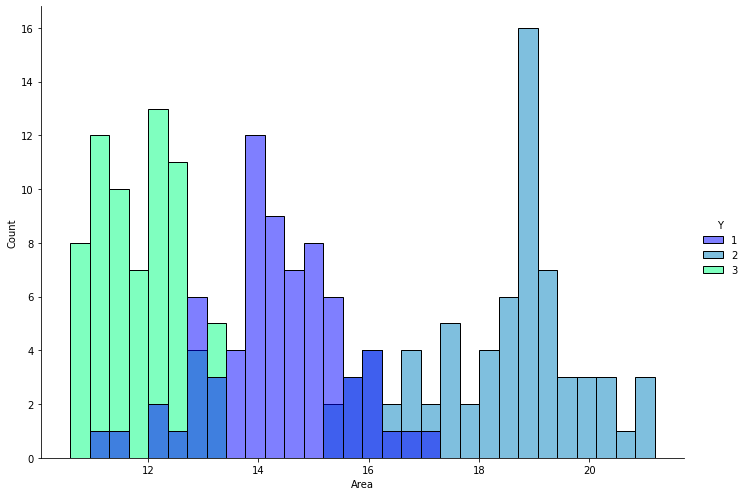

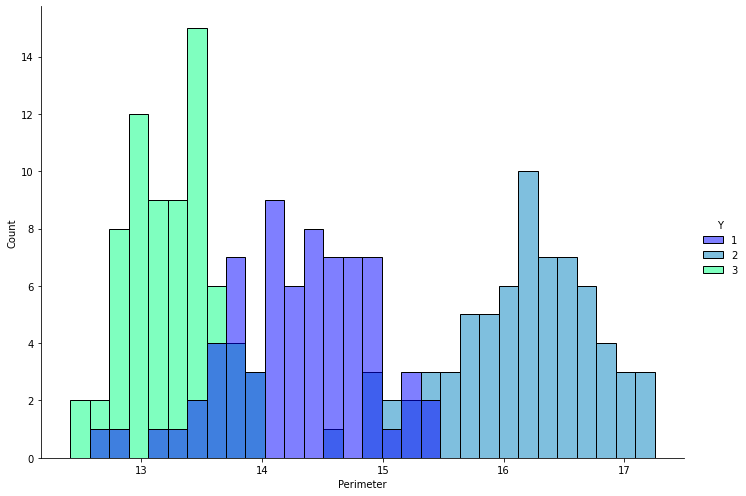

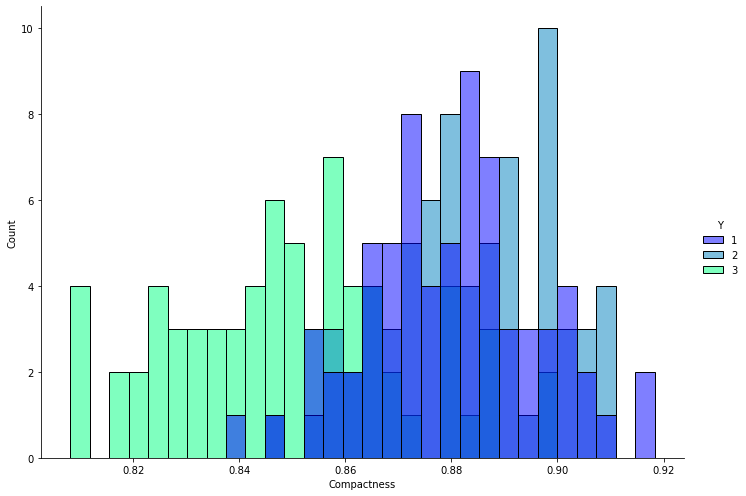

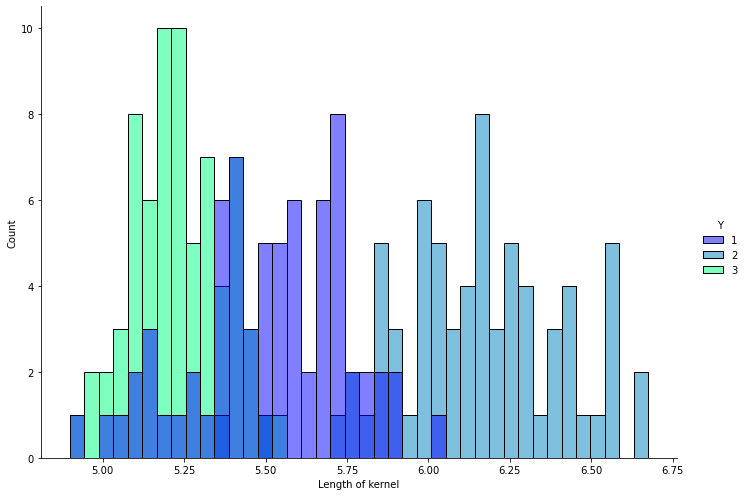

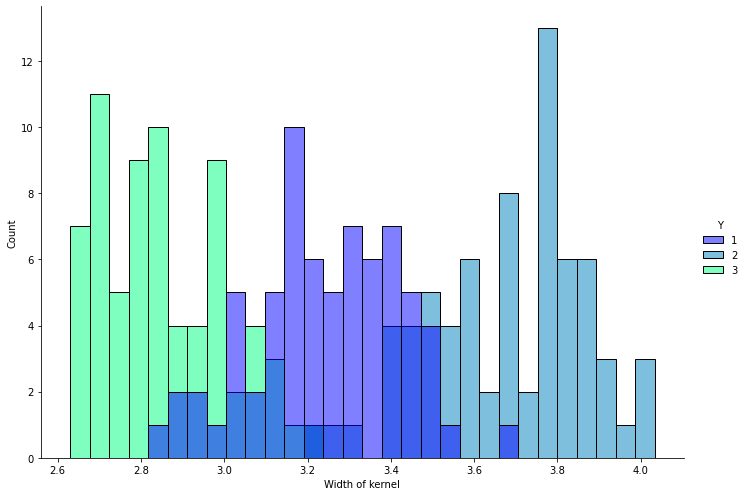

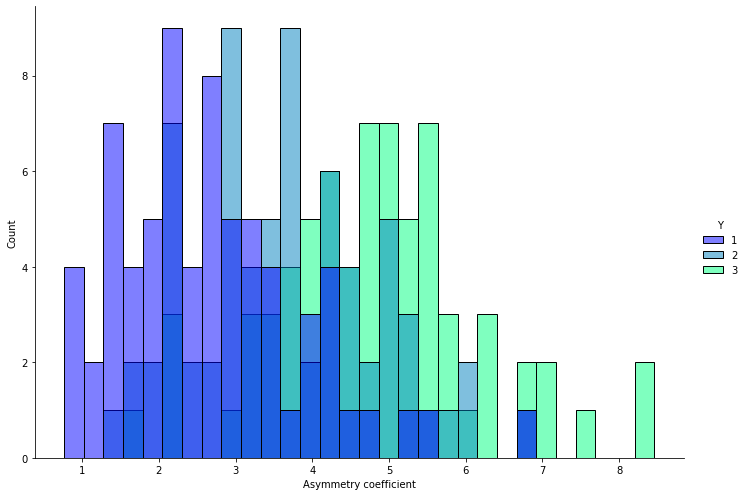

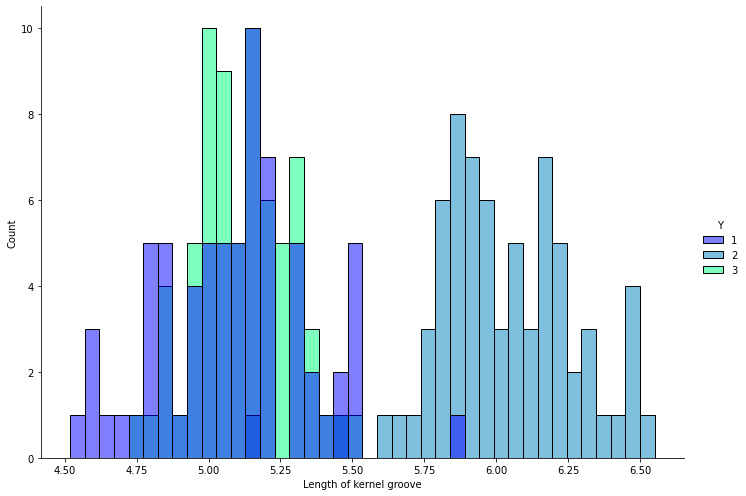

In [76]:
#histogram plots
sns.displot(data=dataset, x='Area', kind='hist',height=7, aspect=1.4, bins=30, hue='Y',palette='winter')
sns.displot(data=dataset, x='Perimeter', kind='hist',height=7, aspect=1.4, bins=30, hue='Y',palette='winter')
sns.displot(data=dataset, x='Compactness', kind='hist',height=7, aspect=1.4, bins=30, hue='Y',palette='winter')
sns.displot(data=dataset, x='Length of kernel', kind='hist',height=7, aspect=1.4, bins=40, hue='Y',palette='winter')
sns.displot(data=dataset, x='Width of kernel', kind='hist',height=7, aspect=1.4, bins=30, hue='Y',palette='winter')
sns.displot(data=dataset, x='Asymmetry coefficient', kind='hist',height=7, aspect=1.4, bins=30, hue='Y',palette='winter')
sns.displot(data=dataset, x='Length of kernel groove', kind='hist',height=7, aspect=1.4, bins=40, hue='Y',palette='winter')

In [35]:
#prior probability
la= sorted(list(dataset['Y'].unique()))
prior = []
for i in la:
    prior.append(len(dataset[dataset['Y']==i])/len(dataset))
print(prior)        

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [36]:
# binning
import math
d1=dataset[dataset['Y']==1]
d2=dataset[dataset['Y']==2]
d3=dataset[dataset['Y']==3]
b1=[]
b2=[]
b3=[]
for i in d1:
    b=[0]
    if(i!='Y'):
        m1=min(d1[i])
        m2=max(d1[i])
        w=(m2-m1)/9
        b*=10
        for j in d1[i]:
            b[math.floor((j-m1)/w)]+=1
        b1.append(b)            
for i in d2:
    b=[0]
    if(i!='Y'):
        m1=min(d2[i])
        m2=max(d2[i])
        w=(m2-m1)/9
        b*=10
        for j in d2[i]:
            b[math.floor((j-m1)/w)]+=1
        b2.append(b)        
for i in d3:
    b=[0]
    if(i!='Y'):
        m1=min(d3[i])
        m2=max(d3[i])
        w=(m2-m1)/9
        b*=10
        for j in d3[i]:
            b[math.floor((j-m1)/w)]+=1
        b3.append(b)        
print(b1)
print()
print(b2)
print()
print(b3)

[[2, 3, 8, 7, 19, 15, 7, 6, 2, 1], [2, 2, 5, 8, 12, 14, 14, 8, 4, 1], [2, 4, 4, 17, 15, 11, 10, 5, 1, 1], [2, 5, 4, 14, 11, 15, 13, 5, 0, 1], [4, 5, 8, 16, 12, 11, 9, 4, 0, 1], [10, 12, 19, 13, 7, 6, 1, 1, 0, 1], [5, 7, 10, 15, 17, 8, 7, 0, 0, 1]]

[[6, 5, 6, 5, 11, 22, 5, 6, 3, 1], [4, 3, 5, 7, 9, 17, 12, 7, 5, 1], [1, 4, 6, 8, 14, 9, 8, 13, 6, 1], [2, 0, 4, 9, 14, 15, 12, 7, 6, 1], [3, 4, 8, 9, 6, 12, 15, 9, 3, 1], [5, 9, 13, 15, 9, 8, 6, 4, 0, 1], [1, 1, 0, 6, 20, 15, 14, 7, 5, 1]]

[[6, 7, 15, 6, 9, 10, 8, 4, 4, 1], [2, 2, 8, 14, 9, 12, 13, 6, 3, 1], [5, 9, 8, 10, 14, 11, 3, 7, 2, 1], [1, 4, 11, 14, 12, 11, 7, 7, 2, 1], [12, 11, 11, 11, 6, 10, 4, 4, 0, 1], [4, 2, 10, 15, 20, 11, 3, 3, 1, 1], [3, 3, 6, 19, 11, 11, 11, 4, 1, 1]]


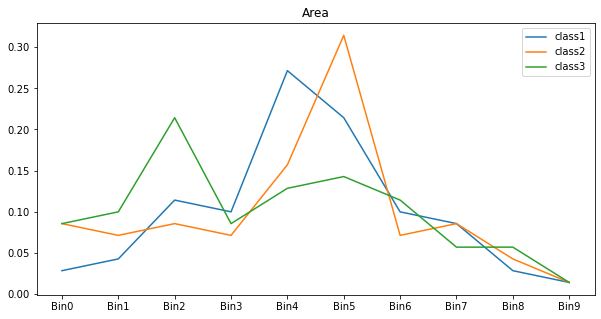

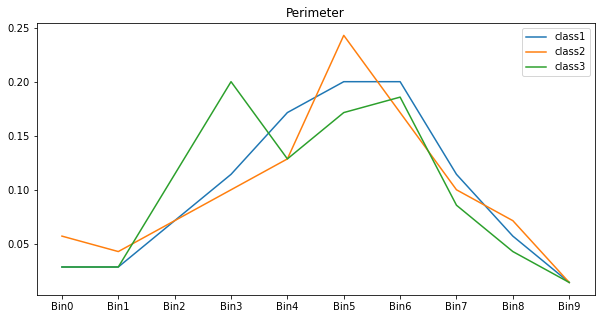

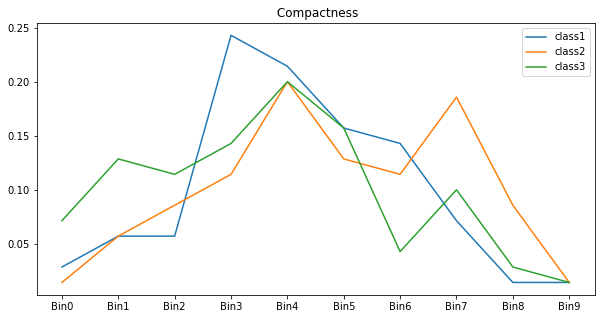

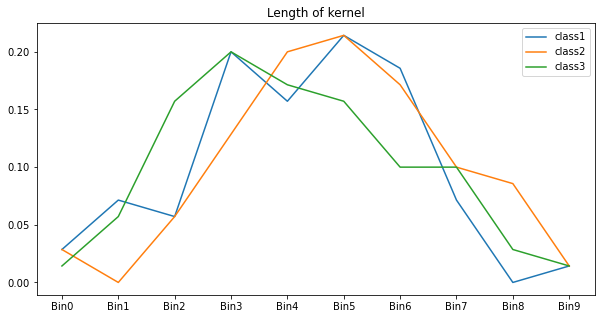

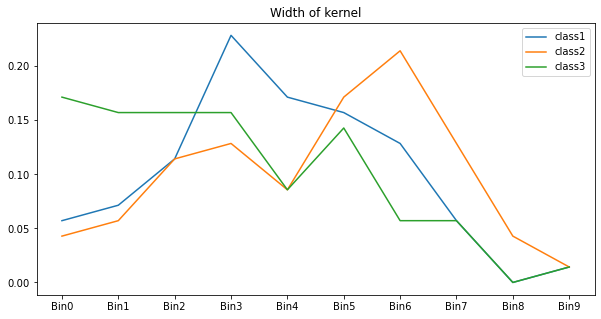

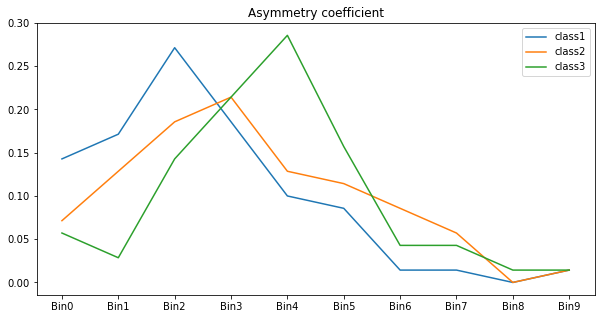

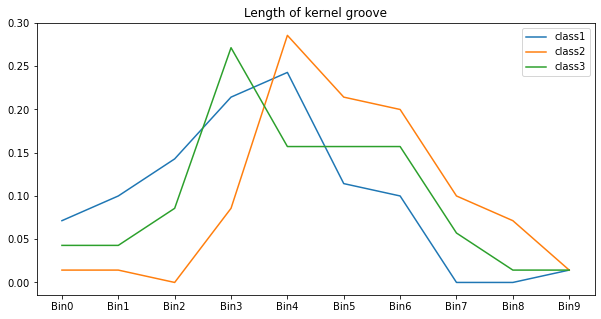

In [38]:
#likelihoood probability
p_b1=[]
p_b2=[]
p_b3=[]
for i in b1:
    p=[]
    for j in i:
        p.append(j/sum(i))
    p_b1.append(p)    
for i in b2:
    p=[]
    for j in i:
        p.append(j/sum(i))
    p_b2.append(p)  
for i in b3:
    p=[]
    for j in i:
        p.append(j/sum(i))
    p_b3.append(p)      
for i in range(7):
    courses = list('Bin'+str(i) for i in range(10))
    fig = plt.figure(figsize = (10, 5))
    plt.plot(courses, p_b1[i])
    plt.plot(courses, p_b2[i])
    plt.plot(courses, p_b3[i])
    plt.title(col[i])
    plt.legend(["class1","class2", "class3"])

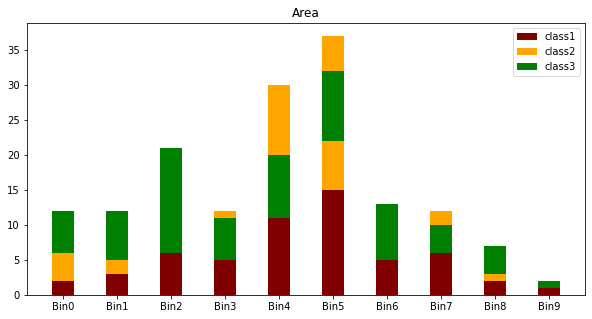

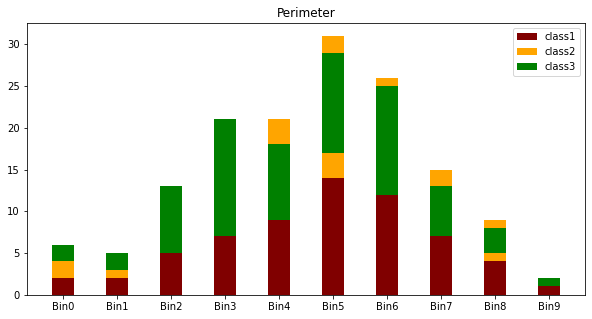

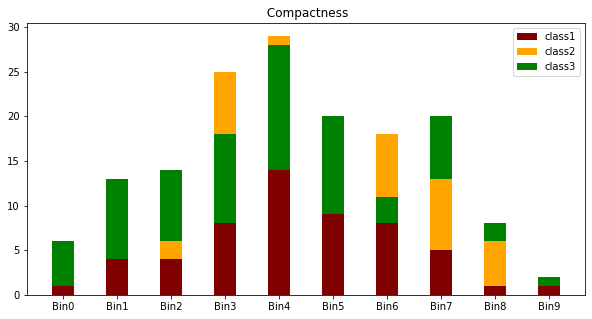

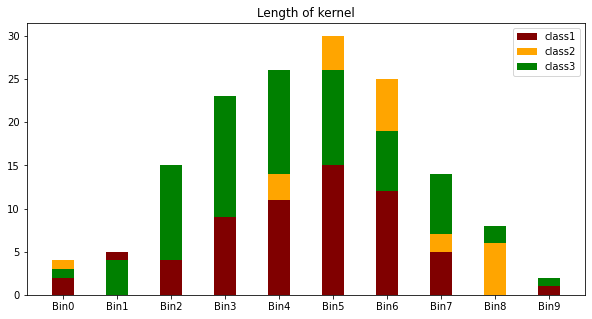

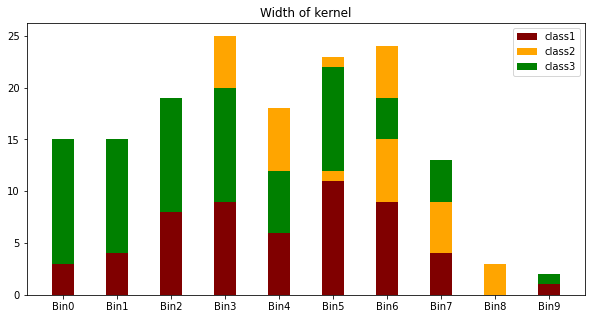

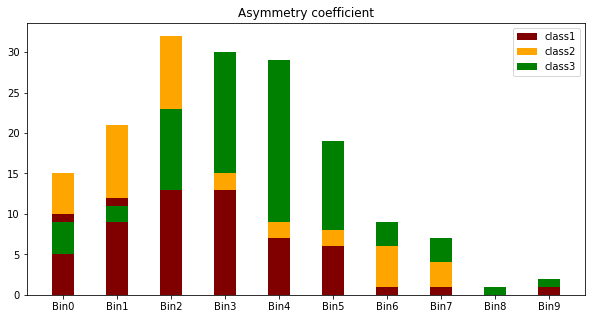

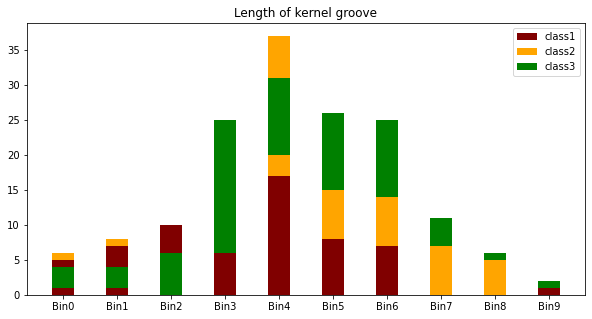

In [46]:
#Plot the count of each unique element for each class.
binn=b1+b2+b3
for i in range(7):
    courses = list('Bin'+str(i) for i in range(10))
    fig = plt.figure(figsize = (10, 5))
    plt.bar(courses, b1[i], color ='maroon',width = 0.4)
    plt.bar(courses, b2[i], color ='orange',width = 0.4,bottom=b1[i])
    plt.bar(courses, b3[i], color ='green',width = 0.4,bottom=b2[i])
    plt.title(col[i])
    plt.legend(["class1","class2", "class3"])

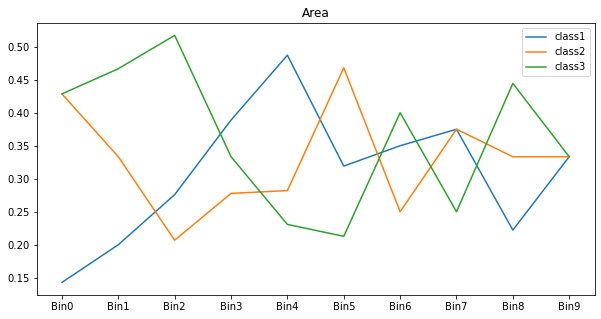

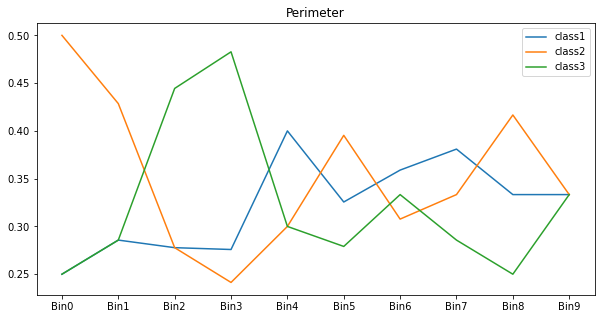

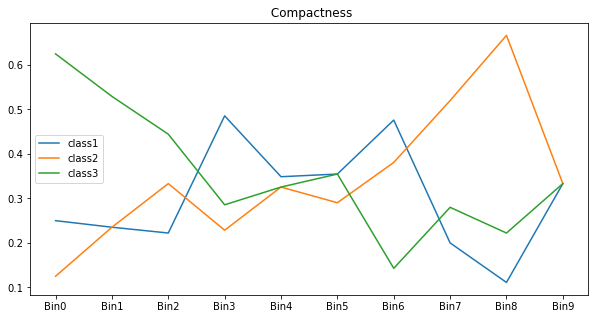

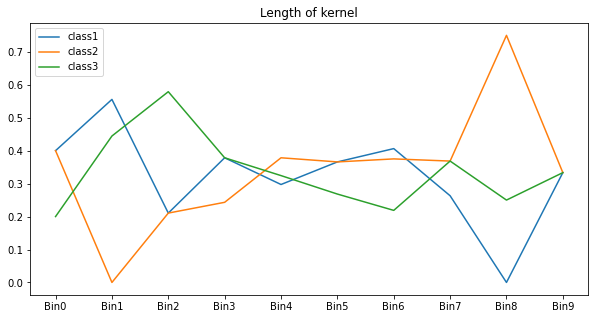

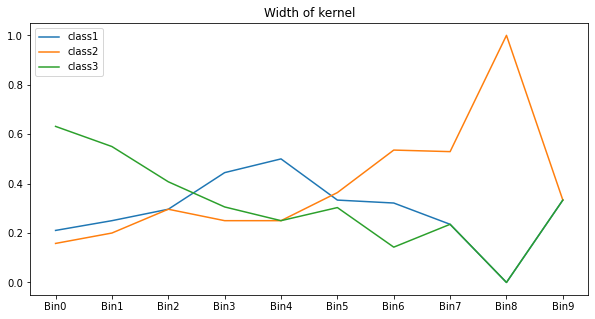

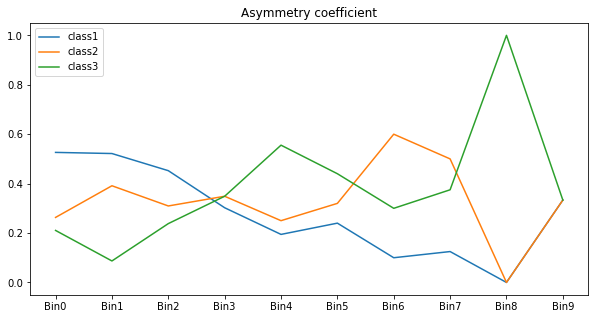

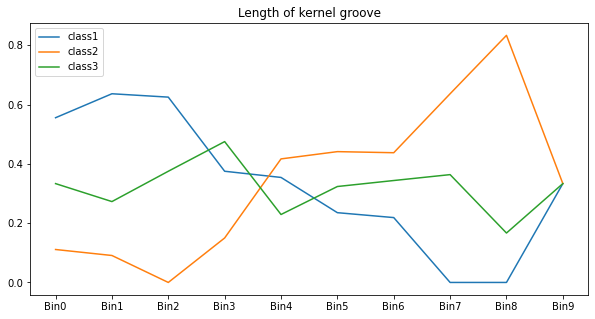

In [40]:
#posterior probability
post1=[]
post2=[]
post3=[]
proba=p_b1+p_b2+p_b3
for i in range(7):
    p=[]
    for j in range(10):
        prob=p_b1[i][j]/(p_b1[i][j]+p_b2[i][j]+p_b3[i][j])
        p.append(prob)
    post1.append(p)
for i in range(7):
    p=[]
    for j in range(10):
        prob=p_b2[i][j]/(p_b1[i][j]+p_b2[i][j]+p_b3[i][j])
        p.append(prob)
    post2.append(p)
for i in range(7):
    p=[]
    for j in range(10):
        prob=p_b3[i][j]/(p_b1[i][j]+p_b2[i][j]+p_b3[i][j])
        p.append(prob)
    post3.append(p)  
for i in range(7):
    courses = list('Bin'+str(i) for i in range(10))
    fig = plt.figure(figsize = (10, 5))
    plt.plot(courses, post1[i])
    plt.plot(courses, post2[i])
    plt.plot(courses, post3[i])
    plt.title(col[i])
    plt.legend(["class1","class2", "class3"])